In [1]:
import numpy as np
import csv
import os
from math import sin, asin, cos, radians, fabs, sqrt
from matplotlib import pyplot as plt

In [2]:
ROOT = '/home/rick/PythonWorkplace/CIGIT2021/data/622/split_2'

In [3]:
paths = []
keys = ['date','number','condition','direction','location','speed',\
        'distance','coord','speed_inter','coord_inter']

In [4]:
for file in os.listdir(ROOT):
    file_path = os.path.join(ROOT, file)
    paths.append(file_path)

In [6]:
len(paths)

1387

# Difine distance computation func

In [7]:
EARTH_RADIUS = 6371

In [8]:
def hav(theta):
    s = sin(theta / 2)
    return s * s

In [9]:
def get_distance_hav(location_0, location_1):
    lat0 = radians(location_0[0])
    lng0 = radians(location_0[1])
    lat1 = radians(location_1[0])
    lng1 = radians(location_1[1])

    dlng = fabs(lng0 - lng1)
    dlat = fabs(lat0 - lat1)
    h = hav(dlat) + cos(lat0) * cos(lat1) * hav(dlng)
    distance = 2 * EARTH_RADIUS * asin(sqrt(h))

    return distance

# Read CSV

In [10]:
count = 0

for i in paths:
    tmp_name_dic = 'path%d' %count
    tmp_lst = []
    globals()[tmp_name_dic] = dict.fromkeys(keys,"")
    globals()[tmp_name_dic][keys[0]] = i[-25:-15]   # date
    globals()[tmp_name_dic][keys[1]] = i[-14:-8]    # number
    globals()[tmp_name_dic][keys[2]] = i[-7:-6]     # condition: 1 for first, 2 for last
    globals()[tmp_name_dic][keys[3]] = i[-5:-4]     # direction: 1 for up2dn, 2 for dn2up
    globals()[tmp_name_dic][keys[4]] = []    # location
    globals()[tmp_name_dic][keys[5]] = []    # speed
    globals()[tmp_name_dic][keys[6]] = [0]   # distance
    globals()[tmp_name_dic][keys[7]] = [0]   # coord
    count += 1
    
    with open(i, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            globals()[tmp_name_dic][keys[4]].append((float(row[1]),float(row[2])))  # location: (lati,longi)
            globals()[tmp_name_dic][keys[5]].append(float(row[3]))   # speed
    
    for y in range(1, len(globals()[tmp_name_dic][keys[4]])):
        tmp_d = get_distance_hav(globals()[tmp_name_dic][keys[4]][y-1],globals()[tmp_name_dic][keys[4]][y])
        tmp_d = round(tmp_d,2)
        globals()[tmp_name_dic][keys[6]].append(tmp_d)
        globals()[tmp_name_dic][keys[7]].append(round(globals()[tmp_name_dic][keys[7]][y-1] + tmp_d,2))
        
    globals()[tmp_name_dic][keys[6]] = np.array(globals()[tmp_name_dic][keys[6]])
    globals()[tmp_name_dic][keys[7]] = 1000 * np.array(globals()[tmp_name_dic][keys[7]])
    

# Delete unqualified files

In [13]:
for i in range(count):
    tmp_name = 'path%d' %i
    if len(globals()[tmp_name][keys[7]]) != len(globals()[tmp_name][keys[5]]) or len(globals()[tmp_name][keys[7]]) == 0:
        print('1:',globals()[tmp_name][keys[0]]+globals()[tmp_name][keys[1]])
        delete_file = globals()[tmp_name][keys[0]] + '_' + globals()[tmp_name][keys[1]]\
        + '_' + globals()[tmp_name][keys[2]] + '_' + globals()[tmp_name][keys[3]] + '.csv'
        os.remove(ROOT + '/' + delete_file)
    elif np.max(globals()[tmp_name][keys[7]]) >= 25000:   # 622全长24.5km，超过25km的为异常，全部舍弃
        print('2:',globals()[tmp_name][keys[0]]+globals()[tmp_name][keys[1]])
        delete_file = globals()[tmp_name][keys[0]] + '_' + globals()[tmp_name][keys[1]]\
        + '_' + globals()[tmp_name][keys[2]] + '_' + globals()[tmp_name][keys[3]] + '.csv'
        os.remove(ROOT + '/' + delete_file)

2: 2020-06-06BW2291
2: 2020-06-27BW2210
2: 2020-09-20BW1857
2: 2020-09-20BW1895
2: 2020-07-19BW2237
2: 2020-10-18BW2270
2: 2020-06-26BW1857
2: 2020-07-19BP3690
2: 2020-08-23BW2209
2: 2020-10-02BW1895
2: 2020-07-18BW2289
2: 2020-06-14BW2289
2: 2020-08-08BW2291
2: 2020-05-04BW2209
2: 2020-07-11BW1895
2: 2020-06-26BW2289
2: 2020-05-24BW1895
2: 2020-05-02BW2297
2: 2020-07-11BW1282
2: 2020-05-02BW2209
2: 2020-10-25BW2237
2: 2020-07-25BW2210
2: 2020-08-30BW1872
2: 2020-05-03BW2270
2: 2020-06-13BW1857
2: 2020-07-18BW1875
2: 2020-10-24BW1895
2: 2020-05-04BW2233
2: 2020-09-12BW2289
2: 2020-10-02BW2210
2: 2020-08-15BW2233
2: 2020-08-23BW2297
2: 2020-10-17BW1895
2: 2020-08-15BW2209
2: 2020-06-27BW2233
2: 2020-10-31BW2291
2: 2020-08-29BW2237
2: 2020-05-30BW2289
2: 2020-07-12BW1875
2: 2020-10-01BW2233
2: 2020-05-01BW2209
2: 2020-06-20BW2291
2: 2020-10-02BW1857
2: 2020-10-05BW1872
2: 2020-10-06BW1857
2: 2020-06-26BW1272
2: 2020-08-23BW1895
2: 2020-05-04BW2289
2: 2020-06-06BW2209
2: 2020-10-03BW1872


# Interpolation

In [11]:
from scipy import interpolate

In [12]:
for i in range(count):
    tmp_name = 'path%d' %i
    x = globals()[tmp_name][keys[7]]
    y = globals()[tmp_name][keys[5]]
    f = interpolate.interp1d(x,y,kind='linear')
    xnew = np.linspace(0,int(x[-1]),int(x[-1]/10))
    globals()[tmp_name][keys[8]] = np.around(f(xnew), decimals=1)    # speed inter
    globals()[tmp_name][keys[9]] = np.around(xnew)       # coord inter

del xnew

# Alignment

In [13]:
JN_dn2up = (29.631982, 106.553016)
TB = (29.755073, 106.627872)

JN_up2dn = (29.63154, 106.552032)
LJ = (29.758752, 106.631117)

In [21]:
dn2up = np.zeros((0,1900))
up2dn = np.zeros((0,1900))

In [22]:
for i in range(count):
    tmp_name = 'path%d' %i
    if globals()[tmp_name][keys[3]] == '1':   # up2dn
        if globals()[tmp_name][keys[4]][0][0] >= LJ[0] and globals()[tmp_name][keys[4]][0][1] >= LJ[1]:
            diff = 1000 * get_distance_hav(globals()[tmp_name][keys[4]][0], LJ)
            diff = np.around(diff, decimals=-1)
            y1 = globals()[tmp_name][keys[8]][int(diff/10):]
        else:
            y1 = globals()[tmp_name][keys[8]]
        
        if globals()[tmp_name][keys[4]][-1][0] <= JN_up2dn[0] and globals()[tmp_name][keys[4]][-1][1] <= JN_up2dn[1]:
            diff = 1000 * get_distance_hav(globals()[tmp_name][keys[4]][-1], JN_up2dn)
            diff = np.around(diff, decimals=-1)
            if diff <= 10.:
                diff = 10.
            y1 = y1[:-1*int(diff/10)]
        else:
            y1 = y1
        
        if len(y1) < 1900:   # 622全长24.5km，去掉头尾数站，将距离统一为19km，不符合要求的一律舍弃
            pad = 1900-len(y1)
            y1 = np.pad(y1, (0,pad))
        else:
            y1 = y1[:1900]
        up2dn = np.vstack((up2dn,y1))
        
    
    elif globals()[tmp_name][keys[3]] == '2':   #dn2up
        if globals()[tmp_name][keys[4]][0][0] <= JN_dn2up[0] and globals()[tmp_name][keys[4]][0][1] <= JN_dn2up[1]:
            diff = 1000 * get_distance_hav(globals()[tmp_name][keys[4]][0], JN_dn2up)
            diff = np.around(diff, decimals=-1)
            y2 = globals()[tmp_name][keys[8]][int(diff/10):]
        else:
            y2 = globals()[tmp_name][keys[8]]
        
        if globals()[tmp_name][keys[4]][-1][0] >= TB[0] and globals()[tmp_name][keys[4]][-1][1] >= TB[1]:
            diff = 1000 * get_distance_hav(globals()[tmp_name][keys[4]][-1], TB)
            diff = np.around(diff, decimals=-1)
            if diff <= 10.:
                diff = 10.
            y2 = y2[:-1*int(diff/10)]
        else:
            y2 = y2
            
        if len(y2) < 1900:  # 622全长24.5km，去掉头尾数站，将距离统一为19km，不符合要求的一律舍弃
            pad = 1900-len(y2)
            y2 = np.pad(y2, (0,pad))
        else:
            y2 = y2[:1900]
        dn2up = np.vstack((dn2up,y2))
        
    else:
        print('Something wrong:', i)

In [20]:
path58

{'date': '2020-05-02',
 'number': 'BP3690',
 'condition': '2',
 'direction': '1',
 'location': [(29.758530020785358, 106.63079228637747),
  (29.755528403583373, 106.62786672145411),
  (29.75472977168493, 106.62736378187377),
  (29.754009337291293, 106.62703616340816),
  (29.753555127389493, 106.62689088255024),
  (29.752848776222486, 106.62663940314216),
  (29.75281977833047, 106.62664541184809),
  (29.752538726756292, 106.62663237257105),
  (29.74941296563786, 106.62630462104119),
  (29.748328651025243, 106.62614127619884),
  (29.74790854213101, 106.62609116544617),
  (29.74772350309028, 106.62607813216825),
  (29.74761549277392, 106.62608313433272),
  (29.74712243282225, 106.62609312222332),
  (29.746252212847782, 106.62599590437767),
  (29.745245070553583, 106.62599784803515),
  (29.74450193975667, 106.6259737628744),
  (29.741008048653395, 106.62659462390937),
  (29.740148386342188, 106.62705237038915),
  (29.739393799365043, 106.62756122199974),
  (29.737804722263874, 106.62865709

In [23]:
np.savetxt('dn2up.csv',dn2up,delimiter=',')

In [24]:
np.savetxt('up2dn.csv',up2dn,delimiter=',')

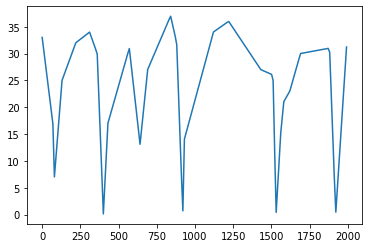

In [148]:
plt.plot(path139[keys[9]][:200], path139[keys[8]][:200])